# Milestone 2

In [1]:
import pandas as pd
import bz2
import json
from feature_generation_par import add_features_to_df

## Load processed quotebank data

In [3]:
years = ['2017'] #['2015', '2016', '2017', '2018', '2019', '2020']
data_folder_path = 'D:/ADA_quotebank/'
file_prefix_r = 'quotes-'
file_suffix_r = '_preprocessed.json.bz2'
generate_path = 'D:/ADA_quotebank/generated/'
file_prefix_w = 'quotes-'
file_suffix_w = '_with_language_feats.csv'
print("Hej")
for year in years:
    # read the file from year
    file_name_r = file_prefix_r + year + file_suffix_r
    print(file_name_r)
    df_quotes_chunks = pd.read_json(data_folder_path + file_name_r, lines=True, compression='bz2', chunksize = 40000)
    for i, df_chunk in enumerate(df_quotes_chunks):
        print("Chunk: " + str(i))
        # add language features and write to csv
        file_name_w = file_prefix_w + year + file_suffix_w
        df_all_features_chunk = add_features_to_df(df_chunk)
        df_all_features_chunk.to_csv(generate_path + file_name_w, header = True, mode = 'a')

Hej
quotes-2017_preprocessed.json.bz2
Chunk: 0


  0%|                                                                                           | 0/24 [00:00<…

  0%|                                                                                           | 0/24 [00:00<…

Chunk: 1


  0%|                                                                                           | 0/24 [00:00<…

  0%|                                                                                           | 0/24 [00:00<…

Chunk: 2


  0%|                                                                                           | 0/24 [00:00<…

  0%|                                                                                           | 0/24 [00:00<…

Chunk: 3


  0%|                                                                                           | 0/24 [00:00<…

  0%|                                                                                           | 0/24 [00:00<…

Chunk: 4


  0%|                                                                                           | 0/24 [00:00<…

KeyboardInterrupt: 

## Previous plots of some distributions

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.pyplot import figure
%matplotlib inline

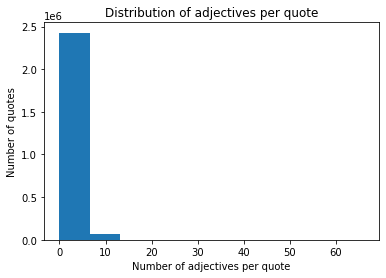

In [ ]:
histogram = df_all_features['adj_count'].hist()
histogram.set_title("Distribution of adjectives per quote")
histogram.set_ylabel("Number of quotes")
histogram.set_xlabel("Number of adjectives per quote")
histogram.grid(False)

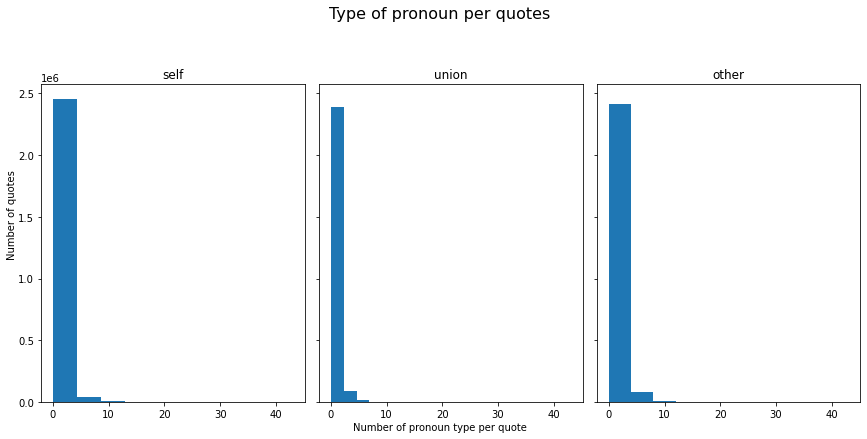

In [ ]:
fig, ax = plt.subplots(1,3,figsize= (12,6), sharey = True, sharex = True)

columns = ['self','union','other']
for idx, col in enumerate(columns):
    ax[idx].hist(df_all_features[col])
    ax[idx].set_title(col)

fig.tight_layout()
fig.text(0.4,0, "Number of pronoun type per quote")
fig.text(0,0.4, "Number of quotes", rotation = 90)

ax[0].xaxis.set_major_formatter(ticker.EngFormatter())
fig.suptitle("Type of pronoun per quotes", fontsize = 16)
plt.subplots_adjust(top=0.80)